# Assignment 1 — EDA (Bird Species Images)
This notebook unzips `train_data.zip` and `test_data.zip`, inspects the folder-based labels (species), checks class balance, and displays sample images.


In [1]:
import random
import zipfile
from collections import Counter
from pathlib import Path

%pip install matplotlib pillow numpy torch torchvision scikit-learn matplotlib pillow numpy tqdm
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Paths (assumes this notebook sits next to the zip files)
BASE_DIR = Path.cwd()
TRAIN_ZIP = BASE_DIR / "train_data.zip"
TEST_ZIP = BASE_DIR / "test_data.zip"

TRAIN_DIR = BASE_DIR / "train_data"
TEST_DIR = BASE_DIR / "test_data"

print("BASE_DIR:", BASE_DIR)
print("TRAIN_ZIP exists:", TRAIN_ZIP.exists())
print("TEST_ZIP exists:", TEST_ZIP.exists())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 10.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 9.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 11.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 9.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
BASE_DIR: /Users/danbrima/Downloads/data_analysis
TRAIN_ZIP exists: True
TEST_ZIP exists: True


In [2]:
def unzip_if_needed(zip_path: Path, target_dir: Path):
    if target_dir.exists():
        print(f"[INFO] {target_dir.name} already exists, skipping unzip.")
        return

    print(f"[INFO] Unzipping {zip_path.name} ...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(target_dir)

    # Fix nesting: target_dir/target_dir/*
    nested_dir = target_dir / target_dir.name
    if nested_dir.exists() and nested_dir.is_dir():
        for item in nested_dir.iterdir():
            item.rename(target_dir / item.name)
        nested_dir.rmdir()

    print(f"[INFO] Done unzipping to {target_dir}")


def get_image_paths(root_dir: Path):
    exts = (".jpg")
    return [p for p in root_dir.glob("*/*") if p.is_file() and p.suffix.lower() in exts]


def get_class_names(root_dir: Path):
    return sorted([d.name for d in root_dir.iterdir() if d.is_dir()])


def inspect_image(image_path: Path):
    with Image.open(image_path) as img:
        return img.size, img.mode  # (width, height), channels mode


def plot_class_distribution(counter: Counter, title: str):
    plt.figure(figsize=(12, 4))
    plt.bar(counter.keys(), counter.values())
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel("Number of images")
    plt.tight_layout()
    plt.show()


def show_samples_per_class(root_dir: Path, samples_per_class=2, max_classes=20):
    class_dirs = get_class_names(root_dir)
    if len(class_dirs) > max_classes:
        class_dirs = class_dirs[:max_classes]
        print(f"[INFO] Too many classes — showing first {max_classes} only.")

    plt.figure(figsize=(samples_per_class * 3, len(class_dirs) * 3))
    plot_idx = 1

    for cls in class_dirs:
        images = [p for p in (root_dir / cls).iterdir() if p.is_file()
                  and p.suffix.lower() in (".jpg", ".jpeg", ".png")]
        if images:
            samples = random.sample(images, min(
                samples_per_class, len(images)))

            for img_path in samples:
                with Image.open(img_path) as img:
                    plt.subplot(len(class_dirs), samples_per_class, plot_idx)
                    plt.imshow(img)
                    plt.axis("off")
                    plt.title(cls)
                    plot_idx += 1

    plt.tight_layout()
    plt.show()

In [3]:
# Unzip datasets
unzip_if_needed(TRAIN_ZIP, TRAIN_DIR)
unzip_if_needed(TEST_ZIP, TEST_DIR)

[INFO] train_data already exists, skipping unzip.
[INFO] test_data already exists, skipping unzip.


In [4]:
# Collect paths
train_images = get_image_paths(TRAIN_DIR)
test_images = get_image_paths(TEST_DIR)

print("[DATASET SIZE]")
print("Train images:", len(train_images))
print("Test images: ", len(test_images))

classes = get_class_names(TRAIN_DIR)
print("\n[CLASSES]")
print("Number of classes:", len(classes))
print("First 20 classes:", classes[:20])

[DATASET SIZE]
Train images: 150
Test images:  157

[CLASSES]
Number of classes: 16
First 20 classes: ['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']


In [5]:
# Image properties (sample)
sample_size, sample_mode = inspect_image(train_images[0])
print("[SAMPLE IMAGE INFO]")
print("Resolution (W x H):", sample_size)
print("Color mode:", sample_mode)

[SAMPLE IMAGE INFO]
Resolution (W x H): (2880, 2160)
Color mode: RGB


[CLASS DISTRIBUTION]
Min class size: 5
Max class size: 20
#classes with <= 20 images: 16


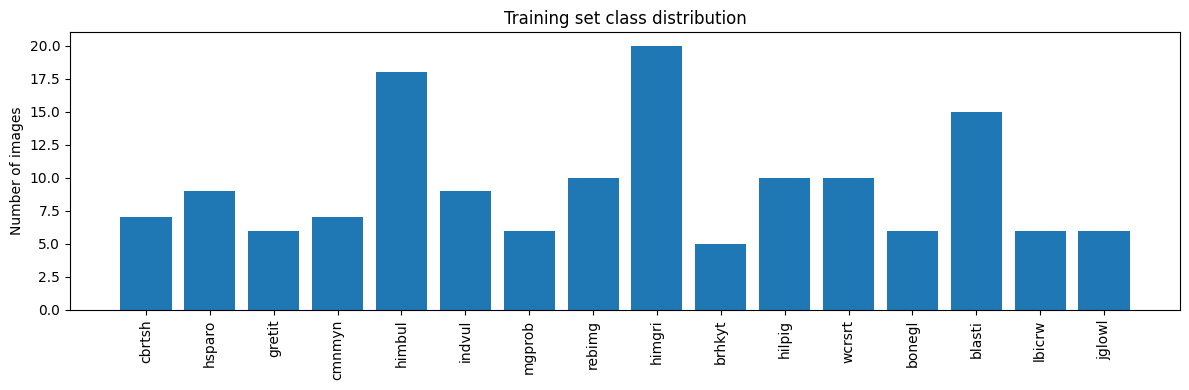

In [6]:
# Class balance
train_labels = [p.parent.name for p in train_images]
class_counts = Counter(train_labels)

print("[CLASS DISTRIBUTION]")
print("Min class size:", min(class_counts.values()))
print("Max class size:", max(class_counts.values()))
print("#classes with <= 20 images:", sum(
    1 for v in class_counts.values() if v <= 20))

plot_class_distribution(class_counts, "Training set class distribution")

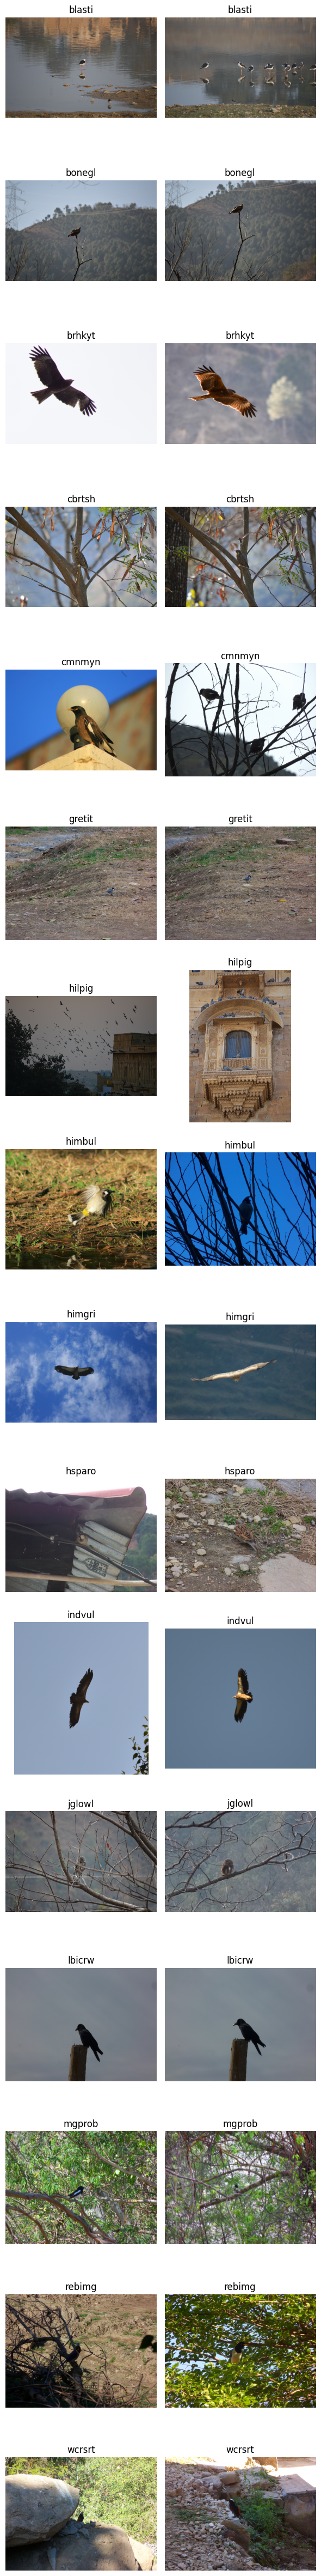

In [7]:
# Show sample images per class
show_samples_per_class(TRAIN_DIR, samples_per_class=2, max_classes=20)

In [ ]:
from pathlib import Path
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import transforms
from torchvision.datasets import ImageFolder
from sklearn.model_selection import StratifiedKFold
from tqdm.auto import tqdm

BASE_DIR = Path.cwd()
TRAIN_DIR = BASE_DIR / "train_data"
TEST_DIR = BASE_DIR / "test_data"


# hyperparameters
BATCH_SIZE = 32
DROP_OUT = 0.3

device = "cuda" if torch.cuda.is_available() else "cpu"
device

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'cpu'

In [ ]:
IMG_SIZE = 224

# Random horizontal flipping is used as a data augmentation technique.
# For bird species classification, left/right orientation does not change the label,
# so flipping helps the model learn orientation-invariant features.
# This increases data diversity, reduces overfitting, and improves generalization.
train_tf = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

test_tf = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

full_train_ds = ImageFolder(TRAIN_DIR, transform=train_tf)
test_ds = ImageFolder(TEST_DIR, transform=test_tf)

num_classes = len(full_train_ds.classes)
num_classes, full_train_ds.classes[:10]

(16,
 ['blasti',
  'bonegl',
  'brhkyt',
  'cbrtsh',
  'cmnmyn',
  'gretit',
  'hilpig',
  'himbul',
  'himgri',
  'hsparo'])

In [ ]:
class SmallCNN(nn.Module):
    def __init__(self, num_classes: int):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * (IMG_SIZE//8) * (IMG_SIZE//8), 256), nn.ReLU(),
            nn.Dropout(DROP_OUT),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


def run_epoch(model, loader, criterion, optimizer=None):
    is_train = optimizer is not None
    model.train() if is_train else model.eval()

    losses, preds, targets = [], [], []

    with torch.set_grad_enabled(is_train):
        for x, y in tqdm(loader, leave=False):
            x, y = x.to(device), y.to(device)
            logits = model(x)
            loss = criterion(logits, y)

            if is_train:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            losses.append(loss.item())
            preds.append(logits.argmax(dim=1).detach().cpu().numpy())
            targets.append(y.detach().cpu().numpy())

    preds = np.concatenate(preds)
    targets = np.concatenate(targets)
    return float(np.mean(losses)), accuracy_score(targets, preds), preds, targets


def plot_history(hist, title=""):
    plt.figure()
    plt.plot(hist["train_loss"], label="train_loss")
    plt.plot(hist["val_loss"], label="val_loss")
    plt.legend()
    plt.title(title + " loss")
    plt.show()

    plt.figure()
    plt.plot(hist["train_acc"], label="train_acc")
    plt.plot(hist["val_acc"], label="val_acc")
    plt.legend()
    plt.title(title + " accuracy")
    plt.show()


===== Fold 1/5 =====


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 01: train acc=0.067 val acc=0.167


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 02: train acc=0.125 val acc=0.167


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 03: train acc=0.167 val acc=0.267


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 04: train acc=0.158 val acc=0.167


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 05: train acc=0.200 val acc=0.333


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 06: train acc=0.300 val acc=0.333


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 07: train acc=0.283 val acc=0.267


Epoch 08: train acc=0.367 val acc=0.233


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


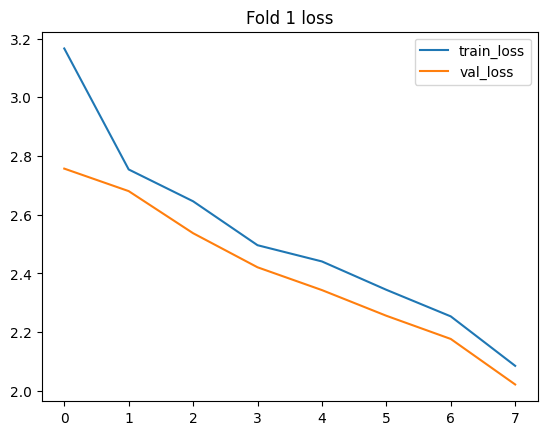

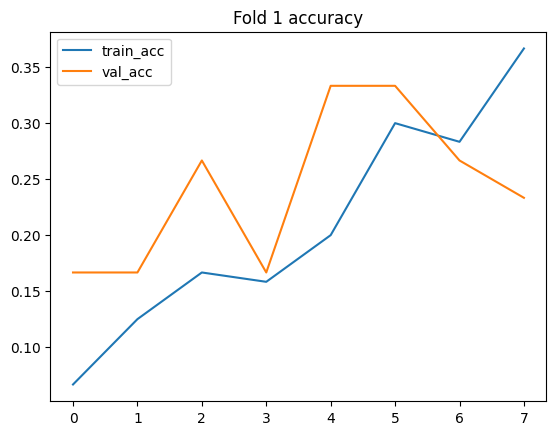


===== Fold 2/5 =====


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 01: train acc=0.083 val acc=0.133


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 02: train acc=0.175 val acc=0.133


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 03: train acc=0.175 val acc=0.200


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 04: train acc=0.258 val acc=0.233


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 05: train acc=0.283 val acc=0.367


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 06: train acc=0.425 val acc=0.367


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 07: train acc=0.400 val acc=0.333


Epoch 08: train acc=0.592 val acc=0.433


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


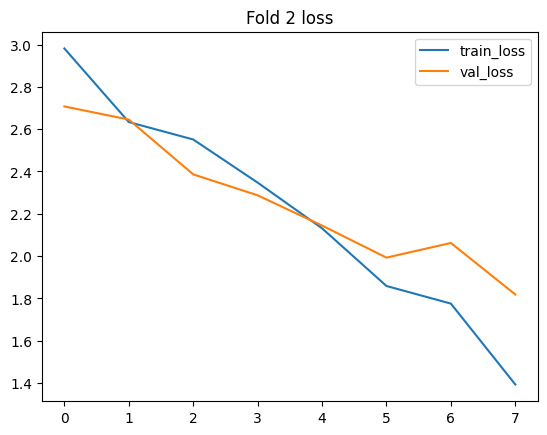

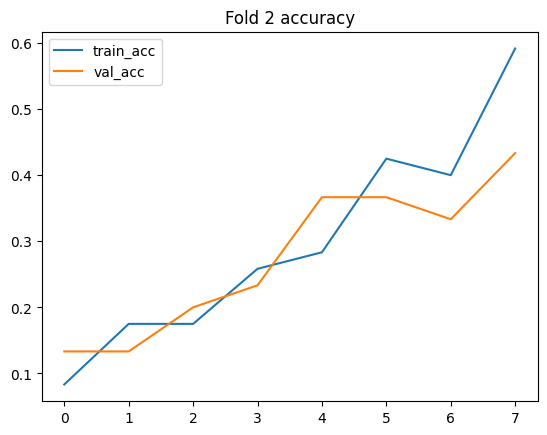


===== Fold 3/5 =====


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 01: train acc=0.067 val acc=0.233


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 02: train acc=0.117 val acc=0.100


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 03: train acc=0.167 val acc=0.200


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 04: train acc=0.167 val acc=0.333


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 05: train acc=0.317 val acc=0.300


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 06: train acc=0.333 val acc=0.367


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 07: train acc=0.417 val acc=0.367


Epoch 08: train acc=0.442 val acc=0.433


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


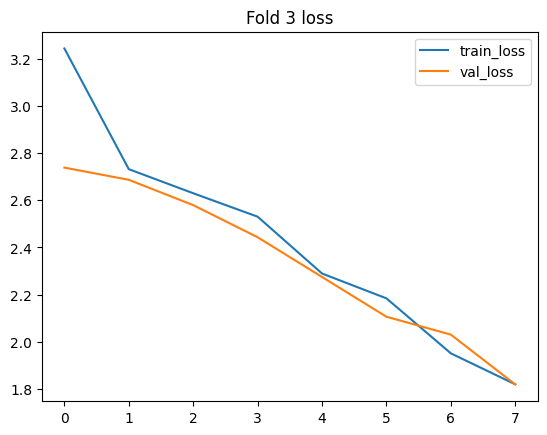

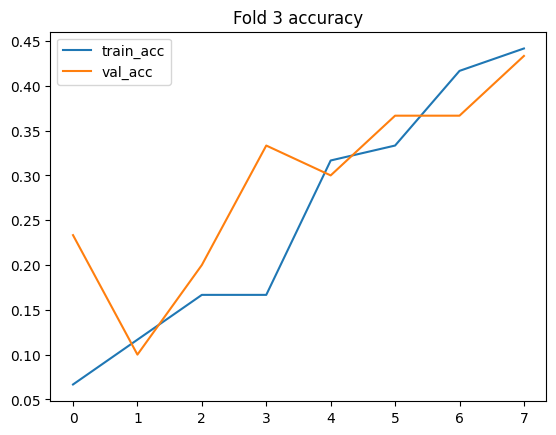


===== Fold 4/5 =====


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 01: train acc=0.058 val acc=0.133


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 02: train acc=0.142 val acc=0.133


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 03: train acc=0.200 val acc=0.133


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 04: train acc=0.200 val acc=0.100


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 05: train acc=0.233 val acc=0.100


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 06: train acc=0.258 val acc=0.167


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 07: train acc=0.250 val acc=0.200


Epoch 08: train acc=0.375 val acc=0.333


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


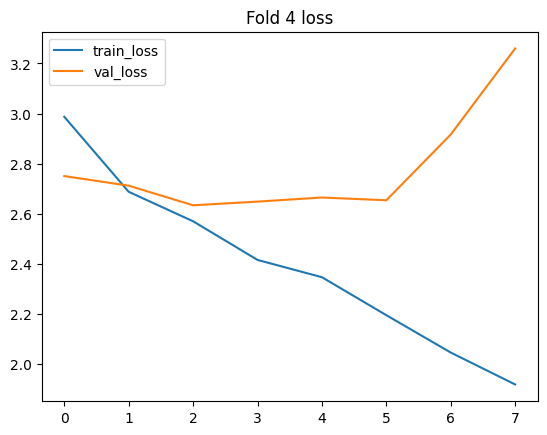

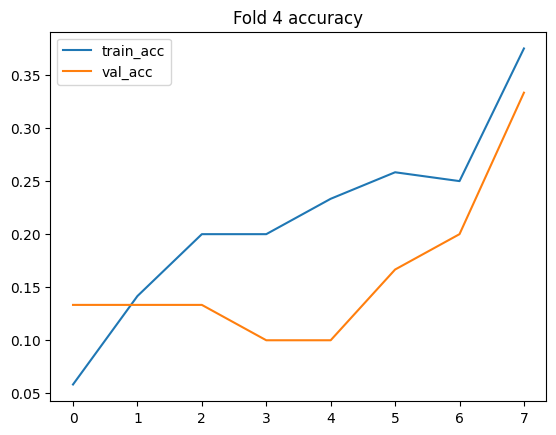


===== Fold 5/5 =====


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 01: train acc=0.133 val acc=0.133


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 02: train acc=0.133 val acc=0.133


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 03: train acc=0.167 val acc=0.133


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 04: train acc=0.233 val acc=0.233


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 05: train acc=0.308 val acc=0.333


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 06: train acc=0.375 val acc=0.233


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Epoch 07: train acc=0.425 val acc=0.167


Epoch 08: train acc=0.433 val acc=0.333


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


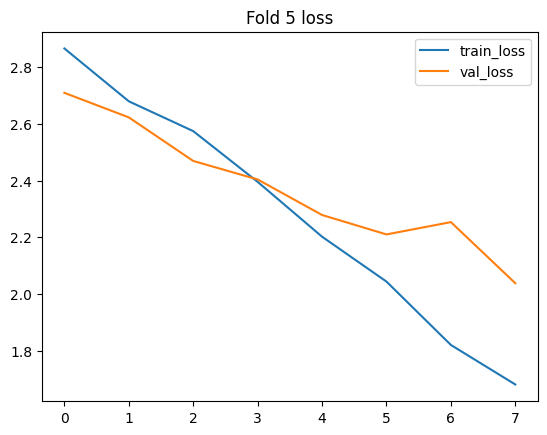

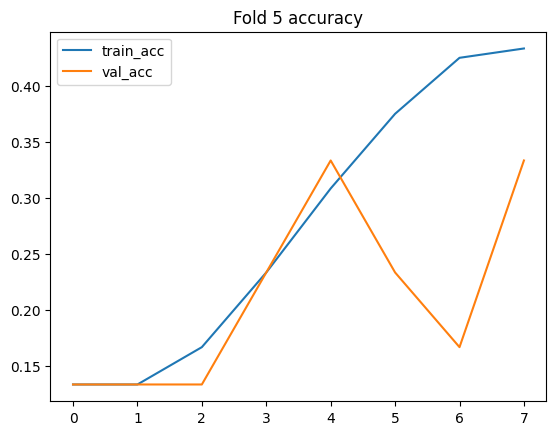

[{'fold': 1,
  'final_train_acc': 0.36666666666666664,
  'final_val_acc': 0.23333333333333334,
  'final_val_loss': 2.0219364166259766,
  'test_acc': 0.2484076433121019},
 {'fold': 2,
  'final_train_acc': 0.5916666666666667,
  'final_val_acc': 0.43333333333333335,
  'final_val_loss': 1.8186748027801514,
  'test_acc': 0.25477707006369427},
 {'fold': 3,
  'final_train_acc': 0.44166666666666665,
  'final_val_acc': 0.43333333333333335,
  'final_val_loss': 1.8183331489562988,
  'test_acc': 0.267515923566879},
 {'fold': 4,
  'final_train_acc': 0.375,
  'final_val_acc': 0.3333333333333333,
  'final_val_loss': 3.2595858573913574,
  'test_acc': 0.2484076433121019},
 {'fold': 5,
  'final_train_acc': 0.43333333333333335,
  'final_val_acc': 0.3333333333333333,
  'final_val_loss': 2.0379583835601807,
  'test_acc': 0.19745222929936307}]

In [12]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

K = 5
batch_size = 32
epochs = 8
lr = 1e-3

targets = np.array([y for _, y in full_train_ds.samples])

skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=RANDOM_SEED)

fold_results = []
fold_test_probs = []  # store test probabilities per fold for mean-ensemble

for fold, (train_idx, val_idx) in enumerate(skf.split(np.zeros(len(targets)), targets), start=1):
    print(f"\n===== Fold {fold}/{K} =====")

    train_subset = Subset(full_train_ds, train_idx)
    val_subset = Subset(ImageFolder(
        TRAIN_DIR, transform=test_tf), val_idx)  # val uses test_tf

    train_loader = DataLoader(
        train_subset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(
        val_subset, batch_size=batch_size, shuffle=False, num_workers=2)
    test_loader = DataLoader(
        test_ds, batch_size=batch_size, shuffle=False, num_workers=2)

    model = SmallCNN(num_classes).to(device)
    # We tried different loss functions; CrossEntropyLoss worked best.
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    hist = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

    for ep in range(1, epochs+1):
        tr_loss, tr_acc, * \
            _ = run_epoch(model, train_loader, criterion, optimizer)
        va_loss, va_acc, *_ = run_epoch(model, val_loader, criterion)

        hist["train_loss"].append(tr_loss)
        hist["train_acc"].append(tr_acc)
        hist["val_loss"].append(va_loss)
        hist["val_acc"].append(va_acc)

        print(f"Epoch {ep:02d}: train acc={tr_acc:.3f} val acc={va_acc:.3f}")

    plot_history(hist, title=f"Fold {fold}")

    # Evaluate on test
    model.eval()
    all_probs = []
    all_test_targets = []
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            logits = model(x)
            probs = torch.softmax(logits, dim=1).cpu().numpy()
            all_probs.append(probs)
            all_test_targets.append(y.numpy())
    all_probs = np.concatenate(all_probs)
    all_test_targets = np.concatenate(all_test_targets)

    test_pred = all_probs.argmax(axis=1)
    test_acc = accuracy_score(all_test_targets, test_pred)

    fold_results.append({
        "fold": fold,
        "final_train_acc": hist["train_acc"][-1],
        "final_val_acc": hist["val_acc"][-1],
        "final_val_loss": hist["val_loss"][-1],
        "test_acc": test_acc
    })
    fold_test_probs.append(all_probs)

fold_results

In [13]:
mean_probs = np.mean(np.stack(fold_test_probs, axis=0), axis=0)
mean_pred = mean_probs.argmax(axis=1)
mean_test_acc = accuracy_score(all_test_targets, mean_pred)
mean_test_acc

0.27388535031847133

In [ ]:
import random


def show_predictions(dataset, probs, n_good=6, n_bad=6, n_uncertain=6):
    y_true = np.array([y for _, y in dataset.samples])
    y_pred = probs.argmax(axis=1)
    conf = probs.max(axis=1)

    good = np.where(y_pred == y_true)[0]
    bad = np.where(y_pred != y_true)[0]
    uncertain = np.argsort(conf)[:n_uncertain]  # lowest confidence

    picks = {
        "Good (high confidence)": sorted(random.sample(list(good), min(n_good, len(good))), key=lambda i: -conf[i]),
        "Bad (high confidence)": sorted(random.sample(list(bad),  min(n_bad,  len(bad))),  key=lambda i: -conf[i]),
        "Uncertain (low confidence)": list(uncertain)
    }

    class_names = dataset.classes

    for title, idxs in picks.items():
        plt.figure(figsize=(12, 3))
        plt.suptitle(title)
        for j, i in enumerate(idxs[:6]):
            img_path, yt = dataset.samples[i]
            img = Image.open(img_path)
            plt.subplot(1, 6, j+1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(
                f"T:{class_names[yt]}\nP:{class_names[y_pred[i]]}\n{conf[i]:.2f}")
        plt.show()


# Use the mean-ensemble probs on the test set:
show_predictions(test_ds, mean_probs)

In [ ]:
cm = confusion_matrix(all_test_targets, mean_pred)
plt.figure(figsize=(8, 8))
plt.imshow(cm)
plt.title("Confusion Matrix (mean-of-folds)")
plt.axis("off")
plt.show()